In [1]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [3]:
data_dir = '../GTSRB'
train_path = os.path.join(data_dir, 'Final_Training', 'Images')
test_path = os.path.join(data_dir, 'Final_Test', 'Images')
test_csv_path = os.path.join(data_dir, 'Final_Test', 'GT-final_test.csv')

# Lấy danh sách các lớp (tên thư mục)
classes = sorted([d for d in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, d))])
num_classes = len(classes)

print(f"Số lượng lớp: {num_classes}")
print(f"Tên các lớp (thư mục): {classes[:5]}...{classes[-5:]}") # In ra vài lớp đầu và cuối

Số lượng lớp: 43
Tên các lớp (thư mục): ['00000', '00001', '00002', '00003', '00004']...['00038', '00039', '00040', '00041', '00042']


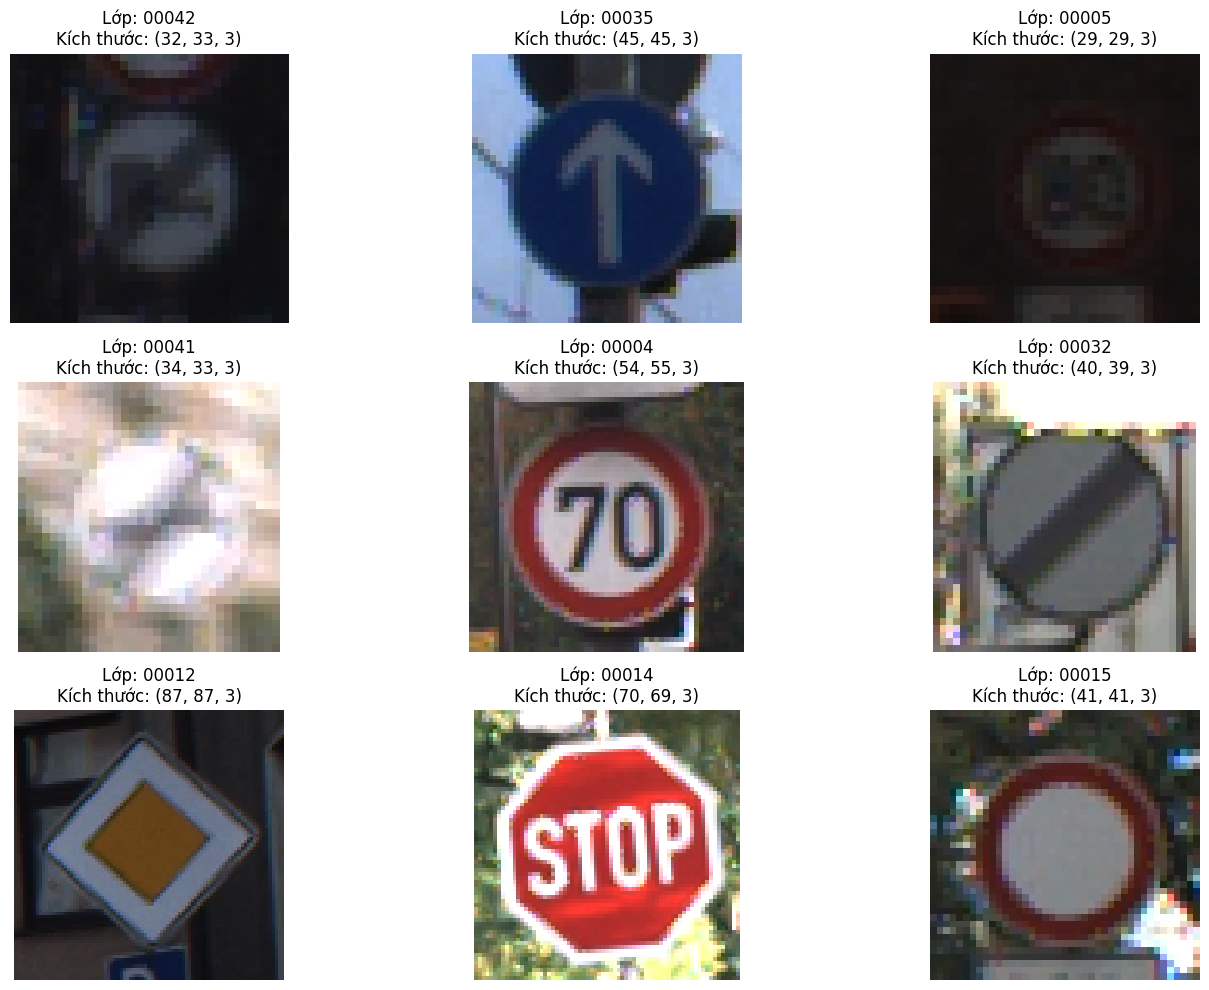

In [4]:
plt.figure(figsize=(15, 10))

# Chọn ngẫu nhiên 9 lớp để hiển thị
random_classes = random.sample(classes, 9)

for i, class_id in enumerate(random_classes):
    class_path = os.path.join(train_path, class_id)
    # Lấy danh sách ảnh trong thư mục lớp (chỉ lấy file .ppm)
    image_files = [f for f in os.listdir(class_path) if f.endswith('.ppm')]
    if not image_files:
        print(f"Không tìm thấy file .ppm trong lớp: {class_id}")
        continue

    # Chọn ngẫu nhiên một ảnh
    random_image_name = random.choice(image_files)
    image_path = os.path.join(class_path, random_image_name)

    try:
        # Đọc ảnh bằng Pillow
        img = Image.open(image_path)
        img_array = np.array(img) # Chuyển sang numpy array để lấy shape

        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.title(f'Lớp: {class_id}\nKích thước: {img_array.shape}')
        plt.axis('off')
    except Exception as e:
        print(f"Lỗi khi đọc ảnh {image_path}: {e}")


plt.tight_layout()
plt.show()

In [5]:
import pandas as pd

# Đọc file CSV
try:
    test_df = pd.read_csv(test_csv_path, delimiter=';') # Dựa trên định dạng GTSRB thường thấy
    print("5 dòng đầu của file GT-final_test.csv:")
    print(test_df.head())
    print("\nThông tin cột:")
    print(test_df.info())
except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy file {test_csv_path}")
except Exception as e:
    print(f"Lỗi khi đọc file CSV: {e}")
    # Có thể thử delimiter khác nếu ';' không đúng
    try:
        print("\nThử đọc lại với delimiter ','...")
        test_df = pd.read_csv(test_csv_path, delimiter=',')
        print("5 dòng đầu của file GT-final_test.csv:")
        print(test_df.head())
        print("\nThông tin cột:")
        print(test_df.info())
    except Exception as e2:
         print(f"Vẫn lỗi khi đọc file CSV: {e2}")


5 dòng đầu của file GT-final_test.csv:
    Filename  Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId
0  00000.ppm     53      54       6       5      48      49       16
1  00001.ppm     42      45       5       5      36      40        1
2  00002.ppm     48      52       6       6      43      47       38
3  00003.ppm     27      29       5       5      22      24       33
4  00004.ppm     60      57       5       5      55      52       11

Thông tin cột:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12630 entries, 0 to 12629
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Filename  12630 non-null  object
 1   Width     12630 non-null  int64 
 2   Height    12630 non-null  int64 
 3   Roi.X1    12630 non-null  int64 
 4   Roi.Y1    12630 non-null  int64 
 5   Roi.X2    12630 non-null  int64 
 6   Roi.Y2    12630 non-null  int64 
 7   ClassId   12630 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 7


Phân bố số lượng ảnh trên mỗi lớp (Tập huấn luyện):
  ClassId  Count  ClassId_int
0   00000    210            0
1   00001   2220            1
2   00002   2250            2
3   00003   1410            3
4   00004   1980            4


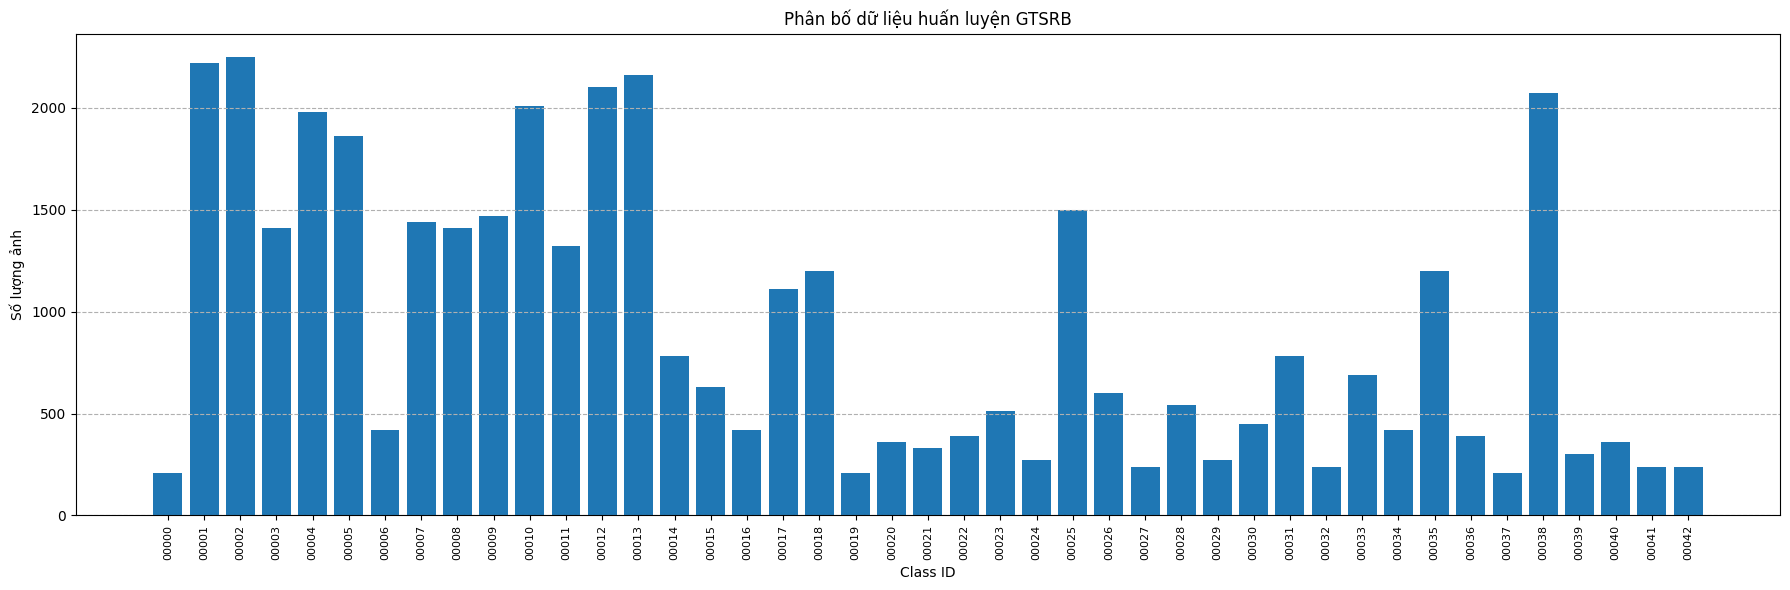


Số lượng ảnh ít nhất/lớp: 210
Số lượng ảnh nhiều nhất/lớp: 2250
Cảnh báo: Dữ liệu có vẻ mất cân bằng đáng kể.


In [6]:
train_counts = {}
for class_id in classes:
    class_path = os.path.join(train_path, class_id)
    # Đếm số file ảnh (.ppm) trong mỗi thư mục lớp
    count = len([f for f in os.listdir(class_path) if f.endswith('.ppm')])
    train_counts[class_id] = count

# Chuyển thành DataFrame để dễ vẽ biểu đồ
train_dist_df = pd.DataFrame(list(train_counts.items()), columns=['ClassId', 'Count'])
# Chuyển ClassId sang dạng số nguyên để sắp xếp đúng thứ tự
train_dist_df['ClassId_int'] = train_dist_df['ClassId'].astype(int)
train_dist_df = train_dist_df.sort_values(by='ClassId_int')


print("\nPhân bố số lượng ảnh trên mỗi lớp (Tập huấn luyện):")
print(train_dist_df.head()) # In vài dòng đầu

# Vẽ biểu đồ phân bố
plt.figure(figsize=(18, 6))
plt.bar(train_dist_df['ClassId'], train_dist_df['Count'])
plt.xlabel("Class ID")
plt.ylabel("Số lượng ảnh")
plt.title("Phân bố dữ liệu huấn luyện GTSRB")
plt.xticks(rotation=90, fontsize=8) # Xoay nhãn trục x để dễ đọc
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# Kiểm tra sự mất cân bằng
min_count = train_dist_df['Count'].min()
max_count = train_dist_df['Count'].max()
print(f"\nSố lượng ảnh ít nhất/lớp: {min_count}")
print(f"Số lượng ảnh nhiều nhất/lớp: {max_count}")
if max_count / min_count > 5: # Ngưỡng ví dụ
    print("Cảnh báo: Dữ liệu có vẻ mất cân bằng đáng kể.")
else:
    print("Mức độ mất cân bằng dữ liệu có vẻ không quá lớn.")


In [7]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# --- Cách 1: Sử dụng scikit-learn (Khuyến nghị) ---
# Chúng ta cần tạo một mảng y_train ảo chỉ chứa nhãn lớp để tính toán
# Lấy danh sách tất cả các nhãn lớp dựa trên số lượng ảnh đã đếm
all_labels = []
for class_id, count in train_counts.items():
    # Lặp lại class_id (dưới dạng số nguyên) 'count' lần
    all_labels.extend([int(class_id)] * count)

all_labels = np.array(all_labels)

# Tính toán trọng số lớp
# 'balanced': Tự động điều chỉnh trọng số tỷ lệ nghịch với tần suất lớp
# theo công thức n_samples / (n_classes * np.bincount(y))
class_weights_sklearn = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(all_labels),
    y=all_labels
)

# Chuyển thành dictionary để dễ sử dụng với Keras/TensorFlow sau này
# Key là class index (0, 1, 2, ...), value là trọng số tương ứng
class_weights_dict = dict(enumerate(class_weights_sklearn))

print("Trọng số lớp được tính bằng scikit-learn (ví dụ 5 lớp đầu):")
for i in range(5):
    print(f"  Lớp {i}: {class_weights_dict[i]:.4f}")


# --- Cách 2: Tính toán thủ công (Để tham khảo) ---
total_samples = train_dist_df['Count'].sum()
num_classes = len(classes)
class_weights_manual = {}
for index, row in train_dist_df.iterrows():
    class_id_int = row['ClassId_int']
    count = row['Count']
    weight = total_samples / (num_classes * count)
    class_weights_manual[class_id_int] = weight

# print("\nTrọng số lớp được tính thủ công (ví dụ 5 lớp đầu):")
# for i in range(5):
#     print(f"  Lớp {i}: {class_weights_manual[i]:.4f}")

# Chúng ta sẽ sử dụng class_weights_dict từ scikit-learn cho các bước sau
print("\nBiến 'class_weights_dict' đã sẵn sàng để sử dụng khi huấn luyện mô hình.")

# Hiển thị trọng số cho lớp có ít mẫu nhất và nhiều mẫu nhất để thấy sự khác biệt
min_count_class_id = int(train_dist_df.loc[train_dist_df['Count'].idxmin()]['ClassId'])
max_count_class_id = int(train_dist_df.loc[train_dist_df['Count'].idxmax()]['ClassId'])

print(f"\nTrọng số cho lớp có ít mẫu nhất (Lớp {min_count_class_id}, {min_count} mẫu): {class_weights_dict[min_count_class_id]:.4f}")
print(f"Trọng số cho lớp có nhiều mẫu nhất (Lớp {max_count_class_id}, {max_count} mẫu): {class_weights_dict[max_count_class_id]:.4f}")


Trọng số lớp được tính bằng scikit-learn (ví dụ 5 lớp đầu):
  Lớp 0: 4.3421
  Lớp 1: 0.4107
  Lớp 2: 0.4053
  Lớp 3: 0.6467
  Lớp 4: 0.4605

Biến 'class_weights_dict' đã sẵn sàng để sử dụng khi huấn luyện mô hình.

Trọng số cho lớp có ít mẫu nhất (Lớp 0, 210 mẫu): 4.3421
Trọng số cho lớp có nhiều mẫu nhất (Lớp 2, 2250 mẫu): 0.4053


In [8]:
import cv2 # Import OpenCV
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical # For one-hot encoding

# Định nghĩa kích thước ảnh mục tiêu
IMG_HEIGHT = 32
IMG_WIDTH = 32
IMG_CHANNELS = 3 # Ảnh màu RGB

# Số lượng lớp đã xác định trước đó
# num_classes = 43

In [9]:
def load_training_data(train_path, img_height, img_width, num_classes):
    """Tải, thay đổi kích thước và chuẩn hóa ảnh huấn luyện."""
    images = []
    labels = []

    print("Bắt đầu tải dữ liệu huấn luyện...")
    for class_id in range(num_classes):
        class_dir = os.path.join(train_path, f"{class_id:05d}") # Định dạng tên thư mục 00000, 00001,...
        if not os.path.isdir(class_dir):
            print(f"Cảnh báo: Không tìm thấy thư mục lớp {class_dir}")
            continue

        image_files = [f for f in os.listdir(class_dir) if f.endswith('.ppm')]
        # print(f"Đang xử lý lớp {class_id:05d} với {len(image_files)} ảnh...") # Bỏ comment nếu muốn xem chi tiết

        for img_file in image_files:
            img_path = os.path.join(class_dir, img_file)
            try:
                # Đọc ảnh bằng OpenCV (mặc định là BGR)
                img = cv2.imread(img_path)
                if img is None:
                    print(f"Cảnh báo: Không thể đọc ảnh {img_path}")
                    continue

                # Thay đổi kích thước ảnh
                img = cv2.resize(img, (img_width, img_height))

                # Chuyển sang RGB (nếu cần, matplotlib và tensorflow thường dùng RGB)
                # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Bỏ comment nếu mô hình/hiển thị yêu cầu RGB

                # Chuẩn hóa pixel về [0, 1]
                img = img / 255.0

                images.append(img)
                labels.append(class_id)
            except Exception as e:
                print(f"Lỗi khi xử lý ảnh {img_path}: {e}")

    print(f"Tải xong {len(images)} ảnh huấn luyện.")
    return np.array(images), np.array(labels)

# Gọi hàm để tải dữ liệu huấn luyện
X_train_full, y_train_full = load_training_data(train_path, IMG_HEIGHT, IMG_WIDTH, num_classes)

print(f"Kích thước dữ liệu huấn luyện (ảnh): {X_train_full.shape}")
print(f"Kích thước dữ liệu huấn luyện (nhãn): {y_train_full.shape}")

Bắt đầu tải dữ liệu huấn luyện...
Tải xong 39209 ảnh huấn luyện.
Kích thước dữ liệu huấn luyện (ảnh): (39209, 32, 32, 3)
Kích thước dữ liệu huấn luyện (nhãn): (39209,)


In [12]:
# Cell 9: Hàm tải và tiền xử lý dữ liệu kiểm tra
import pandas as pd # Đảm bảo pandas được import
import cv2
import numpy as np
import os # Đảm bảo os được import

# Các biến này cần được định nghĩa từ các cell trước
# test_csv_path = os.path.join(data_dir, 'Final_Test', 'GT-final_test.csv')
# test_path = os.path.join(data_dir, 'Final_Test', 'Images')
# IMG_HEIGHT = 32
# IMG_WIDTH = 32

def load_test_data(test_csv_path, test_images_path, img_height, img_width):
    """Tải, thay đổi kích thước và chuẩn hóa ảnh kiểm tra dựa trên file CSV."""
    images = []
    labels = []

    print("Bắt đầu tải dữ liệu kiểm tra...")
    try:
        # Cố gắng đọc với delimiter ';' trước
        test_df = pd.read_csv(test_csv_path, delimiter=';')
        print(f"Đọc thành công {test_csv_path} với delimiter ';'")
    except FileNotFoundError:
         print(f"Lỗi: Không tìm thấy file {test_csv_path}")
         return None, None
    except Exception as e:
        print(f"Lỗi khi đọc file CSV {test_csv_path} với delimiter ';': {e}")
        # Thử đọc lại với delimiter ','
        try:
            print("\nThử đọc lại với delimiter ','...")
            test_df = pd.read_csv(test_csv_path, delimiter=',')
            print(f"Đọc thành công {test_csv_path} với delimiter ','")
        except Exception as e2:
             print(f"Vẫn lỗi khi đọc file CSV: {e2}")
             return None, None

    # Kiểm tra xem các cột cần thiết có tồn tại không
    if 'Filename' not in test_df.columns or 'ClassId' not in test_df.columns:
        print(f"Lỗi: File CSV {test_csv_path} thiếu cột 'Filename' hoặc 'ClassId'. Các cột hiện có: {test_df.columns.tolist()}")
        return None, None

    filenames = test_df['Filename'].values
    class_ids = test_df['ClassId'].values

    print(f"Tìm thấy {len(filenames)} ảnh trong file CSV.")

    successful_loads = 0
    for filename, class_id in zip(filenames, class_ids):
        img_path = os.path.join(test_images_path, filename)
        if not os.path.exists(img_path):
             print(f"Cảnh báo: File ảnh không tồn tại {img_path}")
             continue # Bỏ qua file này

        try:
            # Đọc ảnh bằng OpenCV
            img = cv2.imread(img_path)
            if img is None:
                print(f"Cảnh báo: Không thể đọc ảnh {img_path} bằng cv2.imread")
                continue

            # Thay đổi kích thước ảnh
            img = cv2.resize(img, (img_width, img_height))

            # Chuyển sang RGB (nếu cần)
            # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Chuẩn hóa pixel về [0, 1]
            img = img / 255.0

            images.append(img)
            labels.append(class_id)
            successful_loads += 1
        except Exception as e:
            print(f"Lỗi khi xử lý ảnh {img_path}: {e}")

    print(f"Tải và xử lý thành công {successful_loads} / {len(filenames)} ảnh kiểm tra.")

    if not images: # Nếu không có ảnh nào được tải thành công
        print("Không có ảnh kiểm tra nào được tải.")
        return None, None

    return np.array(images), np.array(labels)

# --- Phần gọi hàm ---
print("\n--- Gọi hàm load_test_data ---")
# Đảm bảo các biến đường dẫn và kích thước đã được định nghĩa ở cell trước
X_test, y_test = load_test_data(test_csv_path, test_path, IMG_HEIGHT, IMG_WIDTH)

# Kiểm tra kết quả
if X_test is not None and y_test is not None:
    print(f"\nKích thước dữ liệu kiểm tra (ảnh): {X_test.shape}")
    print(f"Kích thước dữ liệu kiểm tra (nhãn): {y_test.shape}")
else:
    print("\nKhông thể tải dữ liệu kiểm tra.")



--- Gọi hàm load_test_data ---
Bắt đầu tải dữ liệu kiểm tra...
Đọc thành công ../GTSRB\Final_Test\GT-final_test.csv với delimiter ';'
Tìm thấy 12630 ảnh trong file CSV.
Tải và xử lý thành công 12630 / 12630 ảnh kiểm tra.

Kích thước dữ liệu kiểm tra (ảnh): (12630, 32, 32, 3)
Kích thước dữ liệu kiểm tra (nhãn): (12630,)


In [13]:
# Phân chia dữ liệu huấn luyện thành tập huấn luyện mới và tập xác thực
# test_size=0.2 nghĩa là 20% dữ liệu sẽ dùng cho xác thực
# stratify=y_train_full đảm bảo tỷ lệ các lớp trong tập huấn luyện và xác thực là tương đương nhau
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full,
    y_train_full,
    test_size=0.2,
    random_state=42,  # Đảm bảo kết quả phân chia giống nhau mỗi lần chạy
    stratify=y_train_full
)

print("Sau khi phân chia:")
print(f"Kích thước tập huấn luyện (ảnh): {X_train.shape}")
print(f"Kích thước tập huấn luyện (nhãn): {y_train.shape}")
print(f"Kích thước tập xác thực (ảnh): {X_val.shape}")
print(f"Kích thước tập xác thực (nhãn): {y_val.shape}")
print(f"Kích thước tập kiểm tra (ảnh): {X_test.shape}")
print(f"Kích thước tập kiểm tra (nhãn): {y_test.shape}")

Sau khi phân chia:
Kích thước tập huấn luyện (ảnh): (31367, 32, 32, 3)
Kích thước tập huấn luyện (nhãn): (31367,)
Kích thước tập xác thực (ảnh): (7842, 32, 32, 3)
Kích thước tập xác thực (nhãn): (7842,)
Kích thước tập kiểm tra (ảnh): (12630, 32, 32, 3)
Kích thước tập kiểm tra (nhãn): (12630,)


In [14]:
# Chuyển đổi nhãn dạng số nguyên sang dạng one-hot
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_val_one_hot = to_categorical(y_val, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

print("\nKích thước nhãn sau khi chuyển sang One-Hot:")
print(f"y_train_one_hot: {y_train_one_hot.shape}")
print(f"y_val_one_hot: {y_val_one_hot.shape}")
print(f"y_test_one_hot: {y_test_one_hot.shape}")

print("\nVí dụ nhãn đầu tiên của tập huấn luyện:")
print(f"  Dạng số nguyên: {y_train[0]}")
print(f"  Dạng One-Hot: {y_train_one_hot[0]}")


Kích thước nhãn sau khi chuyển sang One-Hot:
y_train_one_hot: (31367, 43)
y_val_one_hot: (7842, 43)
y_test_one_hot: (12630, 43)

Ví dụ nhãn đầu tiên của tập huấn luyện:
  Dạng số nguyên: 12
  Dạng One-Hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def build_model(input_shape, num_classes):
    """Xây dựng kiến trúc mô hình CNN."""
    model = Sequential()

    # Lớp tích chập đầu tiên + Batch Normalization + Pooling
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization()) # Giúp ổn định và tăng tốc quá trình học
    model.add(MaxPooling2D((2, 2)))
    # model.add(Dropout(0.25)) # Có thể thêm Dropout nếu cần chống overfitting

    # Lớp tích chập thứ hai + Batch Normalization + Pooling
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    # model.add(Dropout(0.25))

    # Lớp tích chập thứ ba + Batch Normalization + Pooling
    model.add(Conv2D(128, (3, 3), activation='relu')) # Thêm lớp sâu hơn
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    # model.add(Dropout(0.25))

    # Làm phẳng output từ lớp tích chập cuối cùng
    model.add(Flatten())

    # Lớp kết nối đầy đủ (Dense) + Dropout
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5)) # Dropout để giảm overfitting

    # Lớp Output
    model.add(Dense(num_classes, activation='softmax')) # Softmax cho phân loại đa lớp

    return model

# Định nghĩa hình dạng đầu vào (chiều cao, chiều rộng, số kênh)
input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

# Tạo mô hình
model = build_model(input_shape, num_classes)

# Biên dịch mô hình
# Optimizer: Adam là lựa chọn phổ biến và hiệu quả
# Loss: CategoricalCrossentropy phù hợp với nhãn one-hot
# Metrics: Theo dõi độ chính xác (accuracy)
optimizer = Adam(learning_rate=0.001) # Có thể điều chỉnh learning rate
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# In cấu trúc mô hình
model.summary()

c:\Users\datho\anaconda3\envs\traffic-sign\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 380,907 (1.45 MB)

 Trainable params: 379,435 (1.45 MB)

 Non-trainable params: 1,472 (5.75 KB)


--- Bắt đầu quá trình huấn luyện ---
Epoch 1/30
490/491 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5087 - loss: 1.8685
Epoch 1: val_accuracy improved from -inf to 0.89964, saving model to models/best_gtsrb_model.keras
491/491 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.5095 - loss: 1.8647 - val_accuracy: 0.8996 - val_loss: 0.3826
Epoch 2/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9548 - loss: 0.1214
Epoch 2: val_accuracy improved from 0.89964 to 0.98049, saving model to models/best_gtsrb_model.keras
491/491 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.9549 - loss: 0.1213 - val_accuracy: 0.9805 - val_loss: 0.0710
Epoch 3/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9805 - loss: 0.0495
Epoch 3: val_accuracy did not improve from 0.98049
491/491 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.9805 - loss: 0.0495 - val_accuracy: 0.9797 - val_loss: 0.0644
Epoch 4/30
489/491 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9827 - loss: 0.0459
Epoch

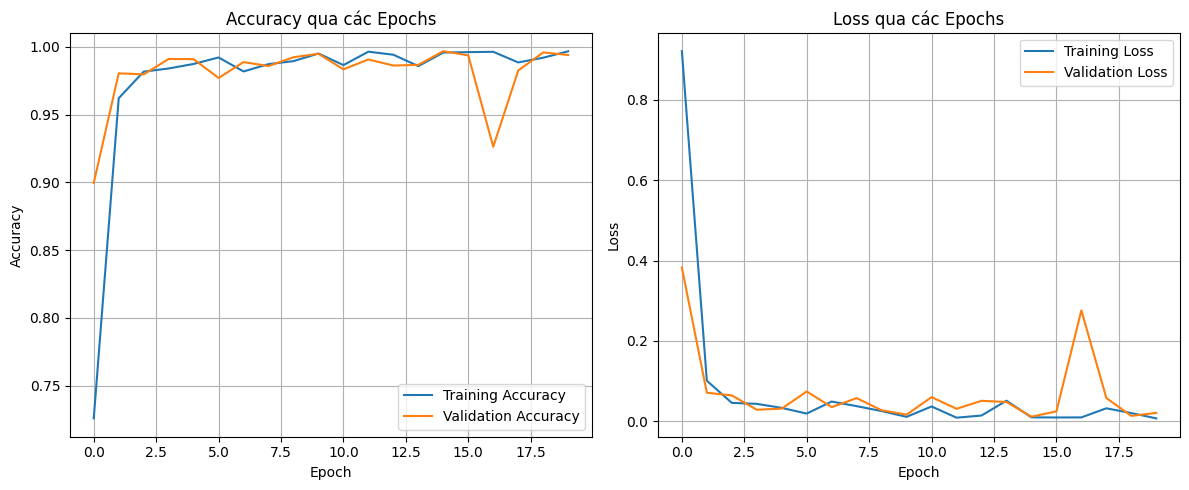

In [16]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Định nghĩa các tham số huấn luyện
EPOCHS = 30 # Số lượt duyệt qua toàn bộ tập huấn luyện (có thể tăng/giảm tùy kết quả)
BATCH_SIZE = 64 # Số lượng mẫu được xử lý trong một lần cập nhật trọng số

# --- Callbacks ---
# 1. EarlyStopping: Dừng huấn luyện nếu validation loss không cải thiện sau 'patience' epochs
early_stopping = EarlyStopping(
    monitor='val_loss',  # Theo dõi loss trên tập validation
    patience=5,         # Số epochs chờ đợi trước khi dừng (nếu không cải thiện)
    verbose=1,          # In thông báo khi dừng sớm
    restore_best_weights=True # Khôi phục trọng số từ epoch tốt nhất
)

# 2. ModelCheckpoint: Lưu lại mô hình tốt nhất dựa trên validation accuracy
# Tạo thư mục để lưu model nếu chưa có
if not os.path.exists('models'):
    os.makedirs('models')

model_checkpoint = ModelCheckpoint(
    filepath='models/best_gtsrb_model.keras', # Tên file lưu mô hình (định dạng .keras mới)
    monitor='val_accuracy', # Theo dõi accuracy trên tập validation
    save_best_only=True, # Chỉ lưu nếu mô hình hiện tại tốt hơn
    verbose=1            # In thông báo khi lưu mô hình tốt hơn
)

# --- Bắt đầu huấn luyện ---
print("\n--- Bắt đầu quá trình huấn luyện ---")

# Sử dụng class_weights_dict đã tính ở Cell 6
# Đảm bảo class_weights_dict đã được định nghĩa và chứa trọng số
if 'class_weights_dict' not in globals():
     print("Lỗi: Biến 'class_weights_dict' chưa được định nghĩa. Hãy chạy lại Cell 6.")
     # Hoặc tính lại ở đây nếu cần, nhưng tốt nhất là chạy lại Cell 6
     # class_weights_dict = ... # Tính lại trọng số
else:
    history = model.fit(
        X_train,
        y_train_one_hot,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        validation_data=(X_val, y_val_one_hot),
        class_weight=class_weights_dict,  # Áp dụng trọng số lớp ở đây!
        callbacks=[early_stopping, model_checkpoint], # Thêm callbacks
        verbose=1 # In thông tin huấn luyện sau mỗi epoch
    )

    print("\n--- Huấn luyện hoàn tất ---")

    # (Tùy chọn) Vẽ biểu đồ learning curves
    plt.figure(figsize=(12, 5))

    # Biểu đồ Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy qua các Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Biểu đồ Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss qua các Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


In [19]:
from tensorflow.keras.models import load_model

try:
    # Load the best saved model
    best_model = load_model('models/best_gtsrb_model.keras')
    print("Loaded best model from 'models/best_gtsrb_model.keras' successfully.")

    # Get metric names (e.g., ['loss', 'accuracy'])
    metric_names = best_model.metrics_names

    # Evaluate on the training set
    train_results = best_model.evaluate(X_train, y_train_one_hot, verbose=0)
    # Evaluate on the validation set
    val_results = best_model.evaluate(X_val, y_val_one_hot, verbose=0)

    # Print out the metrics
    print("\n--- Best Model Evaluation Metrics ---")
    print("Training Set:")
    for name, value in zip(metric_names, train_results):
        print(f"  {name}: {value:.4f}")
    print("Validation Set:")
    for name, value in zip(metric_names, val_results):
        print(f"  {name}: {value:.4f}")

except Exception as e:
    print(f"Error loading or evaluating best model: {e}")


Loaded best model from 'models/best_gtsrb_model.keras' successfully.

--- Best Model Evaluation Metrics ---
Training Set:
  loss: 0.0016
  compile_metrics: 0.9997
Validation Set:
  loss: 0.0115
  compile_metrics: 0.9968


Tải mô hình tốt nhất thành công từ 'models/best_gtsrb_model.keras'

--- Đánh giá trên tập dữ liệu Test ---
Test Loss: 0.1261
Test Accuracy: 0.9679
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step

--- Classification Report (Tập Test) ---
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        60
           1       0.95      0.99      0.97       720
           2       0.99      0.99      0.99       750
           3       0.96      0.95      0.95       450
           4       1.00      0.94      0.97       660
           5       0.94      0.98      0.96       630
           6       1.00      0.84      0.91       150
           7       0.98      0.91      0.94       450
           8       0.90      0.99      0.94       450
           9       0.98      1.00      0.99       480
          10       0.99      0.99      0.99       660
          11       0.99      0.95      0.97       420
          12       0.99      0.97      0.98       690
          13 

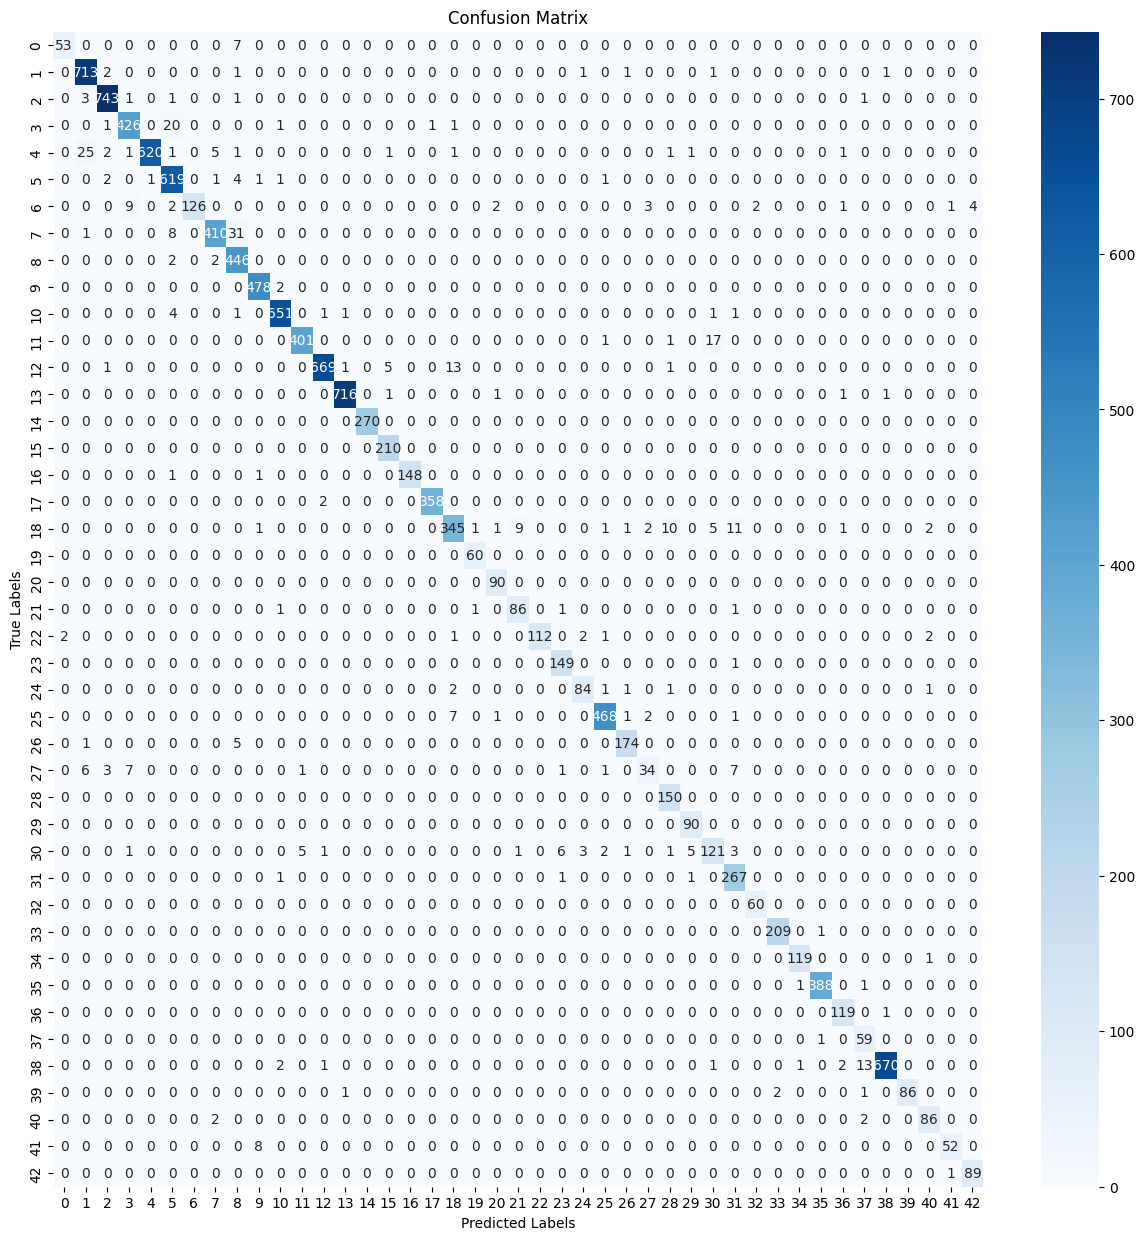

In [18]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns # For plotting confusion matrix

# --- 1. Tải lại mô hình tốt nhất đã lưu ---
try:
    best_model = load_model('models/best_gtsrb_model.keras')
    print("Tải mô hình tốt nhất thành công từ 'models/best_gtsrb_model.keras'")

    # --- 2. Đánh giá trên tập Test ---
    print("\n--- Đánh giá trên tập dữ liệu Test ---")
    test_loss, test_accuracy = best_model.evaluate(X_test, y_test_one_hot, verbose=0)
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # --- 3. Dự đoán trên tập Test để tính các độ đo chi tiết ---
    y_pred_probabilities = best_model.predict(X_test)
    # Chuyển đổi xác suất thành nhãn lớp dự đoán (lấy index của giá trị lớn nhất)
    y_pred_classes = np.argmax(y_pred_probabilities, axis=1)
    # Lấy nhãn lớp thực tế từ dạng one-hot (nếu y_test vẫn còn là số nguyên thì dùng trực tiếp y_test)
    y_true_classes = np.argmax(y_test_one_hot, axis=1) # Hoặc y_true_classes = y_test nếu bạn chưa convert y_test thành one-hot

    # --- 4. Tính và hiển thị Classification Report ---
    print("\n--- Classification Report (Tập Test) ---")
    # target_names có thể là danh sách tên lớp thực tế nếu có, nếu không dùng số thứ tự
    class_labels = [str(i) for i in range(num_classes)]
    print(classification_report(y_true_classes, y_pred_classes, target_names=class_labels))

    # --- 5. Tính và vẽ Ma trận nhầm lẫn ---
    print("\n--- Ma trận nhầm lẫn (Tập Test) ---")
    cm = confusion_matrix(y_true_classes, y_pred_classes)

    plt.figure(figsize=(15, 15))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

except FileNotFoundError:
    print("Lỗi: Không tìm thấy file mô hình 'models/best_gtsrb_model.keras'. Hãy đảm bảo quá trình huấn luyện đã chạy và lưu mô hình.")
except Exception as e:
    print(f"Có lỗi xảy ra: {e}")


Tải mô hình từ models/best_gtsrb_model.keras thành công.

Đã chọn ảnh mẫu thứ 4987 từ tập Test.
Nhãn thực tế (số nguyên): 25
Đã tải và tiền xử lý ảnh từ: image.png
Kích thước ảnh sau khi thêm chiều batch: (1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step

Lớp dự đoán (số nguyên): 1
Xác suất dự đoán: 0.9996


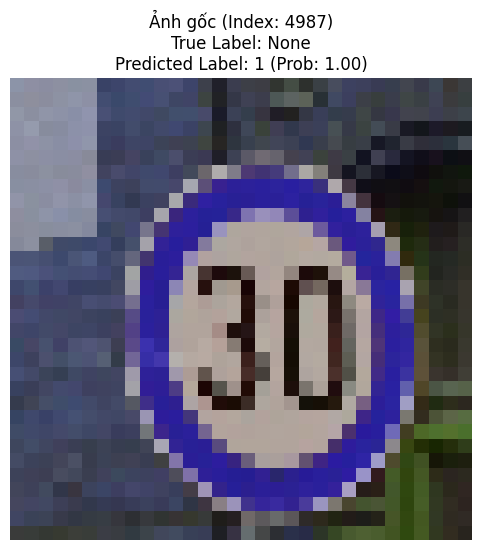


Top 5 dự đoán:
  Lớp: 1, Xác suất: 0.9996
  Lớp: 2, Xác suất: 0.0002
  Lớp: 29, Xác suất: 0.0000
  Lớp: 5, Xác suất: 0.0000
  Lớp: 4, Xác suất: 0.0000


In [24]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2 # Cần thiết nếu bạn muốn tải ảnh từ file

# --- 1. Tải lại mô hình tốt nhất ---
try:
    # Đảm bảo đường dẫn chính xác
    model_path = 'models/best_gtsrb_model.keras'
    best_model = load_model(model_path)
    print(f"Tải mô hình từ {model_path} thành công.")
except Exception as e:
    print(f"Lỗi khi tải mô hình: {e}")
    # Dừng ở đây nếu không tải được mô hình
    raise SystemExit("Không thể tải mô hình.")

# --- 2. Chọn một ảnh mẫu từ tập Test ---
# Lấy ngẫu nhiên một chỉ số từ tập test
random_index = random.randint(0, len(X_test) - 1)
sample_image = X_test[random_index]
true_label_one_hot = y_test_one_hot[random_index]
true_label_int = np.argmax(true_label_one_hot) # Lấy nhãn số nguyên thực tế

print(f"\nĐã chọn ảnh mẫu thứ {random_index} từ tập Test.")
print(f"Nhãn thực tế (số nguyên): {true_label_int}")

# --- (Tùy chọn) Nếu bạn muốn tải ảnh từ file bên ngoài ---
image_file_path = 'image.png' # Hoặc .png, .jpg,...
try:
    img_from_file = cv2.imread(image_file_path)
    if img_from_file is None:
        print(f"Lỗi: Không thể đọc ảnh từ file: {image_file_path}")
    else:
        # Tiền xử lý ảnh từ file
        img_resized = cv2.resize(img_from_file, (IMG_WIDTH, IMG_HEIGHT))
        # img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB) # Nếu mô hình huấn luyện với RGB
        img_normalized = img_resized / 255.0
        sample_image = img_normalized # Ghi đè sample_image nếu dùng ảnh từ file
        print(f"Đã tải và tiền xử lý ảnh từ: {image_file_path}")
        # Lưu ý: không có true_label cho ảnh mới từ file
        true_label_int = None
except Exception as e:
    print(f"Lỗi khi xử lý ảnh từ file {image_file_path}: {e}")
# -------------------------------------------------------------

# --- 3. Tiền xử lý ảnh cho dự đoán ---
# Mô hình mong đợi đầu vào có dạng (batch_size, height, width, channels)
# Ảnh mẫu hiện tại có dạng (height, width, channels)
# Chúng ta cần thêm một chiều cho batch_size (ở đây là 1)
image_for_prediction = np.expand_dims(sample_image, axis=0)
print(f"Kích thước ảnh sau khi thêm chiều batch: {image_for_prediction.shape}") # Sẽ là (1, 32, 32, 3)

# --- 4. Thực hiện dự đoán ---
predictions = best_model.predict(image_for_prediction)
# predictions là một mảng chứa xác suất cho mỗi lớp, ví dụ: [[0.01, 0.02, 0.85, ..., 0.03]]

# --- 5. Lấy lớp dự đoán ---
predicted_class_int = np.argmax(predictions[0]) # Lấy index của xác suất cao nhất
predicted_probability = np.max(predictions[0]) # Lấy giá trị xác suất cao nhất đó

print(f"\nLớp dự đoán (số nguyên): {predicted_class_int}")
print(f"Xác suất dự đoán: {predicted_probability:.4f}")

# --- 6. Hiển thị kết quả ---
plt.figure(figsize=(6, 6))
plt.imshow(sample_image) # Hiển thị ảnh gốc (đã chuẩn hóa)
plt.title(f"Ảnh gốc (Index: {random_index})\nTrue Label: {true_label_int}\nPredicted Label: {predicted_class_int} (Prob: {predicted_probability:.2f})")
plt.axis('off')
plt.show()

# (Tùy chọn) Hiển thị top 5 dự đoán
top_5_indices = np.argsort(predictions[0])[-5:][::-1] # Lấy 5 index có xác suất cao nhất
top_5_probs = predictions[0][top_5_indices]

print("\nTop 5 dự đoán:")
for i in range(len(top_5_indices)):
    print(f"  Lớp: {top_5_indices[i]}, Xác suất: {top_5_probs[i]:.4f}")
